In [1]:
import os
import numpy as np
import pandas
import os
import skimage
from scipy import ndimage, signal
from skimage import exposure
import matplotlib.pyplot as plt
import glob
from skimage import io
import scipy
from scipy import signal
from skimage import feature
from tqdm import tqdm_notebook as tqdm
import json
from matplotlib_scalebar.scalebar import ScaleBar
import networkx as nx
import timeit
import re
import sys

import matplotlib.pyplot as plt
import networkx as nx


# Homebrewed packages

import plotting_tools

## Graph analysis

In [2]:
def _makeG(dic):
    
    G=nx.Graph()
    _Cells = dic['cells']
    G.add_nodes_from(_Cells.keys())
    
    for key in _Cells.keys():
    
        neighbours = _Cells[key]['neighbours']
    
        for node in neighbours:
    
            G.add_edge(key, node)
        
    return G

In [3]:
def _rmOutliers(dic, r):
    
    _Cells = dic['cells']
    xList = []
    yList = []
    zList = []
    delKeys = []
        
    for key in _Cells.keys():
        
        xList.append(int(_Cells[key]['x']))
        yList.append(int(_Cells[key]['y']))
        zList.append(int(_Cells[key]['z']))
        
    xM = int(np.mean(xList))
    yM = int(np.mean(yList))
    zM = int(np.mean(zList))
    
    for key in _Cells.keys():
        
        x = int(_Cells[key]['x'])
        y = int(_Cells[key]['y'])
        z = int(_Cells[key]['z'])
        
        if ((x - xM)**2 + (y - yM)**2 + (z - zM)**2) > r**2:
            
            delKeys.append(key)
    
    for key in delKeys:
    
        try:
            del _Cells[key]
        except KeyError:
            print("Key " + str(key) + " not found")
                
    dic['cells'] = _Cells
    
    return dic

In [84]:
path = r'\\atlas.pasteur.fr\Multicell\Gustave\fusionGustave\TIFF BIS\Spheroids'
dicName = glob.glob(path + r'\\' + '*.json')[10]

with open(dicName, "r") as read_file:
    _Sph = json.load(read_file)

In [85]:
_NewSph = _rmOutliers(_Sph, 500)

In [86]:
G = _makeG(_NewSph)

In [87]:
from community import community_louvain

partition = community_louvain.best_partition(G)

In [88]:
C = partition

In [89]:
A = nx.betweenness_centrality(G)

In [90]:
B = nx.clustering(G)

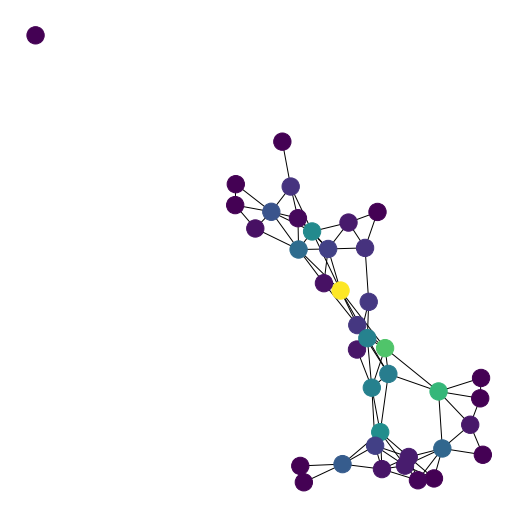

In [91]:

# draw with matplotlib/pylab
plt.figure(figsize=(7,7))

# with nodes colored by degree sized by population
node_color = [float(A[v]) for v in G]

nx.draw_spring(G, node_color=node_color,
        with_labels=False)

plt.show()

In [ ]:
import collections

In [ ]:
path = r'X:\Gustave\Experiments\Nuclei Segmentation\03072019\C1 tif\Spheroids'

df = pandas.DataFrame()
i = 0
    
for fileName in glob.glob(path + r'\\' + '*.json'):
    
    with open(dicName, "r") as read_file:
        _Sph = json.load(read_file)
        
    for key in _Sph['cells'].keys():
        
        df.loc[i, 'name'] = fileName
        df.loc[i, 'degree'] = _Sph['cells'][key]['degree']
        df.loc[i, 'clustering'] = _Sph['cells'][key]['clustering']
        df.loc[i, 'centrality'] = _Sph['cells'][key]['centrality']
        df.loc[i, 'state'] = _Sph['cells'][key]['state']
        i += 1

In [ ]:
plt.scatter(np.log(df['clustering']), np.log(df['degree']))

In [ ]:
n, bins, patches = plt.hist(df['centrality'].values, 15, normed=1, facecolor='green', alpha=0.75)

In [ ]:
%matplotlib
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# What follows is a copy of the 3D plot example code.
# Data is randomly generated so there is no external data import.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x'], df['y'], df['z'])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_zlim(0,51)

plt.show()


from matplotlib_scalebar.scalebar import ScaleBar

for n in range(len(mask_img)):

    plt.subplot(111)
    plt.imshow(mask_img[n], cmap=plt.cm.gray, alpha = 0.8)
    plt.axis('off')
    
    scalebar = ScaleBar(0.000001, location = 'lower right') # 1 pixel = 0.2 meter
    plt.gca().add_artist(scalebar)

    lf = df.loc[df['z'] == n]
    mf = df.loc[df['z'] == n-1]
    pf = df.loc[df['z'] == n+1]

    plt.plot(mf['y'], mf['x'], 'go', label = 'z = ' + str(n-1))
    plt.plot(lf['y'], lf['x'], 'yo', label = 'z = ' + str(n))
    plt.plot(pf['y'], pf['x'], 'ro', label = 'z = ' + str(n+1))

    plt.show()
    plt.legend()
    
    #plt.savefig(r'/Users/gustaveronteix/Desktop/Image Stack/filmstack/im_' + str(n) +'.png')
    plt.close()

In [92]:
_Cells = _NewSph['cells']
G = plotting_tools.generate_random_3Dgraph(_Cells, 1/5, 23, scale = 1/3, seed=None)

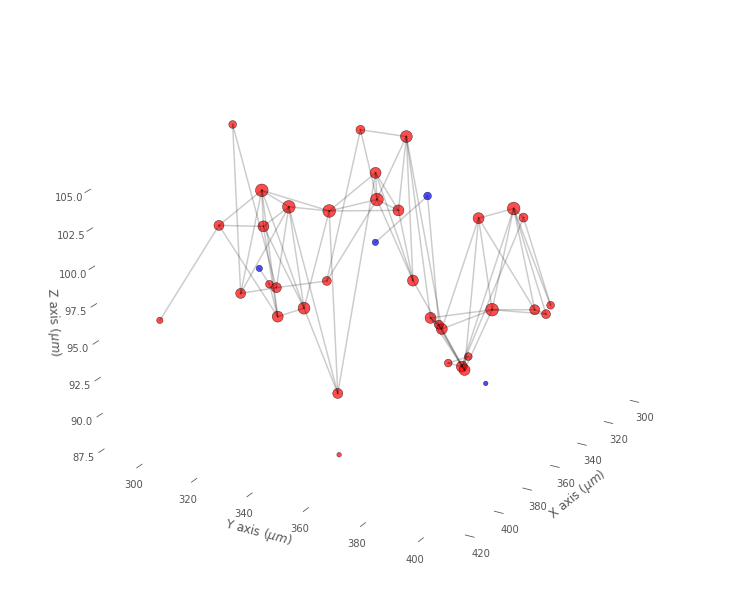

In [93]:
plotting_tools.classifier_plot_3D(G, 30, _NewSph, save=False)

#plt.savefig(path + '\\3D_00_00.png')
plt.show()

C:\Users\gronteix\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


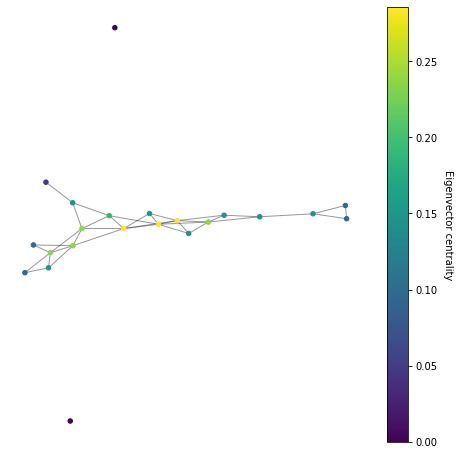

In [68]:
path = r'X:\Gustave\Experiments\Nuclei Segmentation\01072019\tif\\'
dicName = path + '\spheroid_00_00.json'

with open(dicName, "r") as read_file:
    _Sph = json.load(read_file)

import networkx as nx
G=nx.Graph()
_Cells = _Sph['cells']
G.add_nodes_from(_Cells.keys())
for key in _Cells.keys():
    
    neighbours = _Cells[key]['neighbours']
    
    for node in neighbours:
    
        G.add_edge(key, node)

centrality = []
eV = nx.degree_centrality(G)

import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

for key in _Cells.keys():
        
    centrality.append(eV[key])

plt.figure(figsize=(8, 8))

pos = nx.spring_layout(G)
im = nx.draw_networkx_nodes(G, pos, node_size=20, node_color = centrality, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, alpha=0.4)

#legend
cbar = plt.colorbar(im)
cbar.set_label('Eigenvector centrality', rotation=270)
cbar.ax.get_yaxis().labelpad = 15

plt.axis('off')
#plt.savefig(path + '\\fig_58_5.png')
plt.show()